In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import phik 
from ydata_profiling import ProfileReport
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.impute import SimpleImputer


pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)


c:\Users\iriivan\Desktop\Projects\machine_learning\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_csv('data/RKS_project.csv')
df


,Shipment,Invoice,Manager,Name,Unit,Count,Price_per_one,Sum,Cost_price,Year,Category,Subcategory
0,MD-36-23-001 ООО Профессиональные кабельные ма...,2157,Поркашян Геворг,Рядное кабельное крепление РКК-25/40,компл,500.0,129,64500.00,55.0000,2023,Крепление,РКК
1,MD-36-23-002 ООО ПКФ Электрощит,2171,Антипенко Елена,Рядное кабельное крепление РКК-25/40,компл,189.0,215,40635.00,57.0000,2023,Крепление,РКК
2,MD-36-23-003 ООО Эркатек,2138,Кира Ярослав,Короб заземления КЗЭ-О-3х035,шт,1.0,122141.25,122141.25,48100.0000,2023,Короб,NaN
3,MD-36-23-004 ООО КраСур,2172,Антипенко Елена,Рядное кабельное крепление РКК-40/60 с крепежом,компл,12.0,366,4392.00,125.0000,2023,Крепление,РКК
4,MD-36-23-005 ЗАО Стройэнергокомплект,2065,Сонин Алексей,Профиль монтажный МСП-41-Н,м,168.0,808.86,135888.48,274.7745,2023,МСМТ,Профиль МС
...,...,...,...,...,...,...,...,...,...,...,...,...
16787,MD-36-25-0642 ООО Технолог,1166,Антипенко Елена,Рядное кабельное крепление РКК-40/60,шт,24.0,266,6384.00,77.0000,2025,Крепление,РКК
16788,MD-36-25-0643 ООО Завод АСД-электрик,1170,Антипенко Елена,Рядное кабельное крепление РКК-40/60,шт,82.0,198.15,16248.30,77.0000,2025,Крепление,РКК
16789,MD-36-25-0644 ООО Завод АСД-электрик,1148,Антипенко Елена,Высоковольтное кабельное крепление ВКК-65/90,шт,170.0,522.64,88848.80,148.0000,2025,Крепление,ВКК
16790,MD-36-25-0645 ООО СК ЭнергоСтрой,1073,Антипенко Елена,Рядное кабельное крепление РКК-40/60,шт,650.0,266,172900.00,77.0000,2025,Крепление,РКК


In [65]:
df.isna().sum()

Shipment            0
Invoice             0
Manager             0
Name                0
Unit              152
Count               0
Price_per_one       0
Sum                 0
Cost_price        392
Year                0
Category            0
Subcategory      6611
dtype: int64

In [5]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols


Index(['Count', 'Sum', 'Cost_price', 'Year'], dtype='object')

In [ ]:
uniq_name = df['Name'].unique()
df['Name'].nunique()


TypeError: You have to supply one of 'by' and 'level'

In [6]:
grop_of_count = df.groupby(['Name'])['Count'].count().reset_index()
grop_of_count

,Name,Count
0,\nЛГГ-400-100-Н Лоток листовой угол горизонта...,1
1,\nЛШ-100-Н Лоток листовой соединитель шарнирн...,1
2,Короб заземления КЗЭ-О-3х300,1
3,ЛГВ-200-200 Листовой лоток глухой прямая секц...,1
4,ЛЛР-80-Н Лоток лестничный разделитель L=3 м (...,1
...,...,...
2930,Шпилька резьбовая М18х1000 оцинк.,1
2931,Шпилька резьбовая М8х1000 нерж.,2
2932,Шпилька резьбовая М8х1000 оцинк.,14
2933,Шпилька резьбовая М8х2000 оцинк.,3


<Axes: >

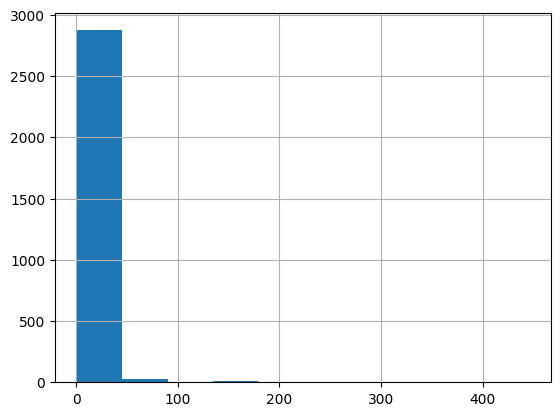

In [30]:
grop_of_count['Count'].hist()

<Axes: xlabel='Count', ylabel='Count'>

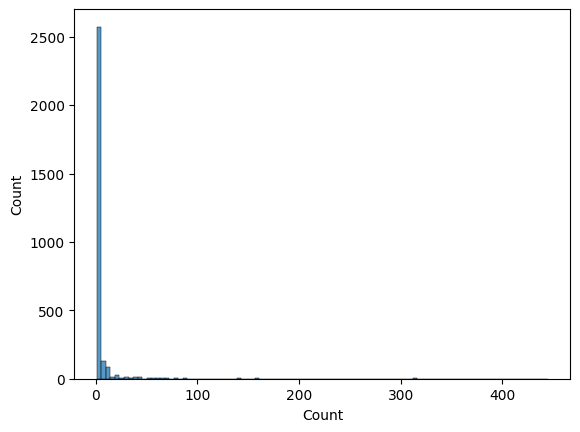

In [32]:
sns.histplot(grop_of_count,x='Count',bins=100)

<Axes: xlabel='Count', ylabel='Count'>

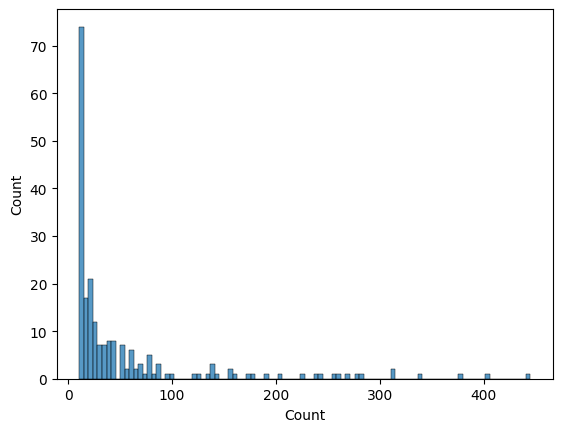

In [ ]:
sns.histplot(grop_of_count[grop_of_count['Count']>10],x='Count',bins=100)

In [48]:
grop_of_count[grop_of_count['Count']>10]['Name']

16                     Анкер-болт М10х110
21                      Анкер-болт М10х70
25                     Анкер-болт М12х110
28          Анкер-болт М12х110 гор. цинк.
34                     Анкер-болт М12х145
                      ...                
2904              Шарнирная опора МСО-П-Н
2921    Шпилька резьбовая М10х1000 оцинк.
2924    Шпилька резьбовая М12х1000 оцинк.
2929    Шпилька резьбовая М16х1000 оцинк.
2932     Шпилька резьбовая М8х1000 оцинк.
Name: Name, Length: 214, dtype: object

In [7]:
df = df[df['Name'].isin(grop_of_count[grop_of_count['Count']>10]['Name'])].reset_index(drop=True)

In [8]:
df = df.sort_values('Year').reset_index(drop=True)
df


,Shipment,Invoice,Manager,Name,Unit,Count,Price_per_one,Sum,Cost_price,Year,Category,Subcategory
0,MD-36-23-011 ООО СМНУ,2059,Антипенко Елена,Рядное кабельное крепление РКК-25/40,компл,36.0,215,7740.00,57.0000,2023,Крепление,РКК
1,MD-36-23-011 ООО СМНУ,2059,Антипенко Елена,Шпилька резьбовая М10х1000 оцинк.,шт,72.0,96,6912.00,92.0000,2023,Метизы,NaN
2,MD-36-23-011 ООО СМНУ,2059,Антипенко Елена,Гайка шестигранная М10 оцинк.,шт,72.0,5.4,388.80,2.4360,2023,Метизы,NaN
3,MD-36-23-011 ООО СМНУ,2059,Антипенко Елена,"Шайба плоская А10,5 оцинк.",шт,72.0,2.12,152.64,0.8976,2023,Метизы,NaN
4,MD-36-23-011 ООО СМНУ,2059,Антипенко Елена,Монтажная гайка МСГ-М10,шт,72.0,138,9936.00,13.7100,2023,Гайка монтажная,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11737,MD-36-25-0023 ООО НПК Химстройэнерго,2031,Антипенко Елена,ЛС-100 Лоток листовой соединитель прямой (комп...,шт,80.0,24,1920.00,42.0000,2025,Лоток,Фасонки листовые
11738,MD-36-25-0024 ООО ПКФ Электрощит,59,Антипенко Елена,Рядное кабельное крепление РКК-40/60,компл,48.0,316.25,15180.00,77.0000,2025,Крепление,РКК
11739,MD-36-25-0024 ООО ПКФ Электрощит,59,Антипенко Елена,Рядное кабельное крепление РКК-25/40,компл,9.0,247.25,2225.25,55.0000,2025,Крепление,РКК
11740,MD-36-25-0025 ООО НИП,2084,Филиппов Андрей,Монтажная гайка МСГ-М12,шт,5284.0,99.03,523274.52,13.9500,2025,Гайка монтажная,NaN


In [9]:
X = df.drop(columns=['Price_per_one'])
y = df['Price_per_one']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,shuffle=False)

In [10]:
text = X.select_dtypes(include=['object']).columns

In [11]:
num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
simpimp = Pipeline([
    ('test',SimpleImputer(strategy='constant',fill_value='Unknown'))
])
transform = ColumnTransformer([
    # ('ohe2', ohe_pipe2, ohe_cols2),
    ('text',simpimp,text),
    ('num_cols', num_pipe, num_cols)
],remainder='passthrough')
model_cbc = Pipeline([
    ('transform', transform),
    ('model', CatBoostRegressor(cat_features=['text__'+col for col in text]))
])

In [ ]:
astype 

In [13]:
model_cbc.fit(X_train,y_train)

CatBoostError: catboost/private/libs/target/target_converter.cpp:38: Target value "1 238,69" cannot be parsed as float

In [25]:
# model.estimators_


In [27]:

# plt.figure(figsize=(15,15))
# plot_tree(model.named_steps['model'], filled=True, fontsize=6)
# plt.show()

In [28]:
pd.DataFrame(model.predict_proba(X_test))

,0,1,2
0,0.000055,0.000316,0.999628
1,0.000023,0.000068,0.999909
2,0.000035,0.000136,0.999829
3,0.000048,0.000265,0.999686
4,0.002895,0.000687,0.996418
...,...,...,...
195,0.000020,0.000106,0.999873
196,0.000032,0.000112,0.999856
197,0.000047,0.000301,0.999653
198,0.005611,0.000775,0.993614


In [ ]:

pred_cbc = model_cbc.predict(X_test)



In [ ]:

 accuracy_score(y_test, pred_cbc)




xgb_model: 0.99

cbc_model: 0.99

lgb_model: 0.99
 


In [ ]:

pr_cbc = precision_score(y_test, pred_cbc, average="weighted")




xgb_model: 0.99

cbc_model: 0.99

lgb_model: 0.9907142857142857
 


In [55]:
re_xgb = recall_score(y_test, pred_xgb, average="weighted")
re_cbc = recall_score(y_test, pred_cbc, average="weighted")
re_lgb = recall_score(y_test, pred_lgb, average="weighted")

print(f'''
xgb_model: {re_xgb}

cbc_model: {re_cbc}

lgb_model: {re_lgb}
 ''')



xgb_model: 0.99

cbc_model: 0.99

lgb_model: 0.99
 


Confusion matrix:
 [[ 20   0   1]
 [  0   6   0]
 [  1   0 172]]


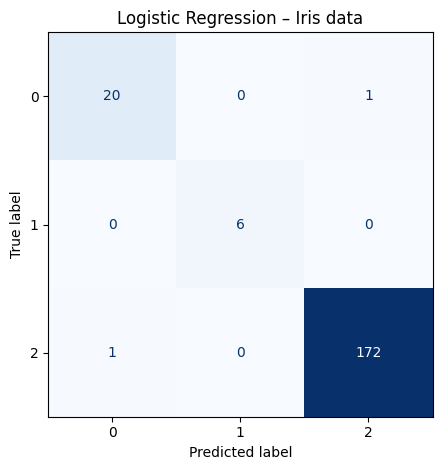

In [ ]:
cm = confusion_matrix(y_test, pred_xgb)
print("Confusion matrix:\n", cm)

# 5. Optional: pretty plot (sklearn ≥ 0.24)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot(cmap="Blues", colorbar=False)
plt.title("Logistic Regression – Iris data")
plt.tight_layout()
plt.show()

Confusion matrix:
 [[ 20   1   0]
 [  0   6   0]
 [  1   0 172]]


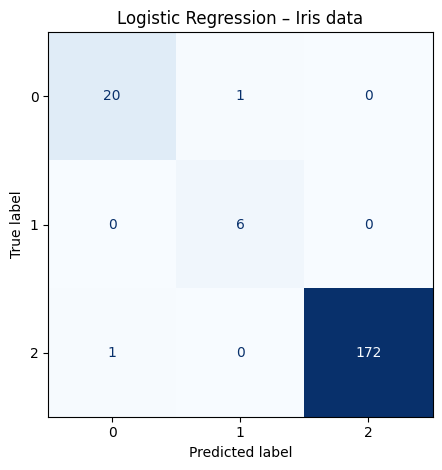

In [56]:
cm = confusion_matrix(y_test, pred_lgb)
print("Confusion matrix:\n", cm)

# 5. Optional: pretty plot (sklearn ≥ 0.24)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot(cmap="Blues", colorbar=False)
plt.title("Logistic Regression – Iris data")
plt.tight_layout()
plt.show()

Confusion matrix:
 [[ 20   0   1]
 [  0   6   0]
 [  1   0 172]]


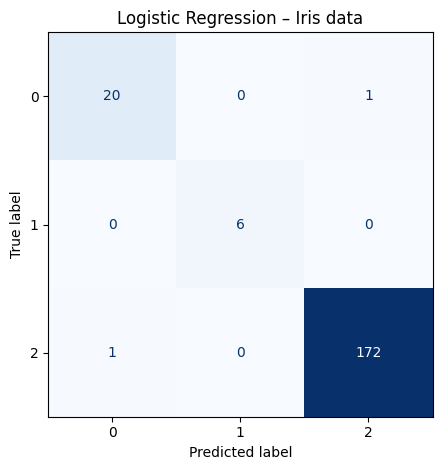

In [57]:
cm = confusion_matrix(y_test, pred_cbc)
print("Confusion matrix:\n", cm)

# 5. Optional: pretty plot (sklearn ≥ 0.24)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot(cmap="Blues", colorbar=False)
plt.title("Logistic Regression – Iris data")
plt.tight_layout()
plt.show()

In [58]:
fc_xgb = f1_score(y_test,pred_xgb,average="weighted")
fc_cbc = f1_score(y_test,pred_cbc,average="weighted")
fc_lgb = f1_score(y_test,pred_lgb,average="weighted")

print(f'''
xgb_model: {fc_xgb}

cbc_model: {fc_cbc}

lgb_model: {fc_lgb}
 ''')


xgb_model: 0.99

cbc_model: 0.99

lgb_model: 0.9901850613154961
 


In [59]:
ohe_pipe2 = Pipeline([
    ('ohe2',OneHotEncoder(sparse_output=False))
])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    ('ohe2', ohe_pipe2, ohe_cols2),
    ('num_cols', num_pipe, num_cols)
])
model_lgb = Pipeline([
    ('transform', transform),
    ('model', lgb.LGBMRegressor())
])

In [62]:
ohe_pipe2 = Pipeline([
    ('ohe2',OneHotEncoder(sparse_output=False))
])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    ('ohe2', ohe_pipe2, ohe_cols2),
    ('num_cols', num_pipe, num_cols)
])
model_lgb = Pipeline([
    ('transform', transform),
    ('model', xgb.XGBRegressor())
])

In [63]:
# ohe_pipe2 = Pipeline([
#     ('ohe2',OneHotEncoder(sparse_output=False))
# ])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    # ('ohe2', ohe_pipe2, ohe_cols2),
    ('num_cols', num_pipe, num_cols)
])
model_lgb = Pipeline([
    ('transform', transform),
    ('model', CatBoostRegressor())
])

In [64]:
mae_xgb = abs(y_test-pred_xgb).mean()
mae_cbc = abs(y_test-pred_cbc).mean()
mae_lgb = abs(y_test-pred_lgb).mean()

print(f'''
xgb_model: {mae_xgb}

cbc_model: {mae_cbc}

lgb_model: {mae_lgb}
 ''')


xgb_model: 0.02

cbc_model: 0.4215

lgb_model: 0.015
 


In [65]:
mse_xgb = ((y_test-pred_xgb)**2).mean()
mse_cbc = ((y_test-pred_cbc)**2).mean()
mse_lgb = ((y_test-pred_lgb)**2).mean()

print(f'''
xgb_model: {mse_xgb}

cbc_model: {mse_cbc}

lgb_model: {mse_lgb}
 ''')


xgb_model: 0.04

cbc_model: 0.7848

lgb_model: 0.025
 


In [66]:
rmse_xgb = (((y_test-pred_xgb)**2).mean())**0.5
rmse_cbc = (((y_test-pred_cbc)**2).mean())**0.5
rmse_lgb = (((y_test-pred_lgb)**2).mean())**0.5

print(f'''
xgb_model: {rmse_xgb}

cbc_model: {rmse_cbc}

lgb_model: {rmse_lgb}
 ''')


xgb_model: 0.2

cbc_model: 0.885889383614004

lgb_model: 0.15811388300841897
 


In [70]:
mape_xgb = (abs(y_test-pred_xgb)/(y_test+1)).mean()
mape_cbc = (abs(y_test-pred_cbc)/(y_test+1)).mean()
mape_lgb = (abs(y_test-pred_lgb)/(y_test+1)).mean()

print(f'''
xgb_model: {mape_xgb}

cbc_model: {mape_cbc}

lgb_model: {mape_lgb}
 ''')


xgb_model: 0.013333333333333332

cbc_model: 0.26854999999999996

lgb_model: 0.008333333333333333
 


In [ ]:
r2_xgb = r2_score(y_test, pred_xgb)
r2_cbc = r2_score(y_test, pred_cbc)
r2_lgb = r2_score(y_test, pred_lgb)

print(f'''
xgb_model: {r2_xgb}

cbc_model: {r2_cbc}

lgb_model: {r2_lgb}
 ''')


xgb_model: 0.8980632008154944

cbc_model: 0.8980632008154944

lgb_model: 0.936289500509684
 


In [37]:
# profile = ProfileReport(df)
# profile.to_file(output_file='output.html')